In [11]:

####################################################################################################
####################################################################################################

import sys
import os.path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display
from IPython.display import Image

import keras
import keras.utils.vis_utils
from keras import backend as K
from keras import layers
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from keras.models import Sequential
from keras.utils import plot_model


In [3]:

####################################################################################################
####################################################################################################

df_train_truth = pd.DataFrame.from_csv("../python_pax_reader/data/train_truth.csv")
df_train_input = pd.DataFrame.from_csv("../python_pax_reader/data/train_input.csv")



In [4]:

####################################################################################################
# First 127 are S2
####################################################################################################

df_train_input = df_train_input.iloc[:, 0:127]
df_train_input.shape


(924, 127)

In [34]:

####################################################################################################
####################################################################################################

nRows = 5

#print()
#display(df_train_truth[0:nRows][:])
#print()
#display(df_train_input[0:nRows][:])
#print()



In [35]:

##########################################################################################
##########################################################################################

num_input_nodes = 127


##########################################################################################
##########################################################################################

#act = 'linear'
act = 'tanh'

model = Sequential()
model.add(Dense(127, activation=act, input_dim=num_input_nodes))
model.add(BatchNormalization())
#model.add(Dense(1024, activation=act))
#model.add(Dense(512, activation=act))
model.add(Dense(100, activation=act))
model.add(Dense(100, activation=act))
model.add(Dense( 40, activation=act))
model.add(Dense( 40, activation=act))
model.add(Dense( 20, activation=act))
model.add(Dense( 20, activation=act))
model.add(Dense(  2))


##########################################################################################
##########################################################################################



In [36]:

##########################################################################################
##########################################################################################

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_absolute_error'            , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_absolute_percentage_error' , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_logarithmic_error' , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='squared_hinge'                  , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='hinge'                          , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_hinge'              , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='logcosh'                        , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy'       , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy'            , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='kullback_leibler_divergence'    , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='poisson'                        , optimizer='adam', metrics=['accuracy'])
#model.compile(loss='cosine_proximity'               , optimizer='adam', metrics=['accuracy'])


##########################################################################################
##########################################################################################

print(df_train_input.shape)
print(df_train_truth.shape)


(924, 127)
(924, 2)


In [37]:

##########################################################################################
##########################################################################################

model.fit(df_train_input, df_train_truth, epochs=10, batch_size=32, verbose=1)
print("Done")


Epoch 1/10
924/924 [==============================] - 3s 3ms/step - loss: 397.3590 - acc: 0.5335
Epoch 2/10
924/924 [==============================] - 0s 206us/step - loss: 385.6718 - acc: 0.5985
Epoch 3/10
924/924 [==============================] - 0s 183us/step - loss: 381.2992 - acc: 0.5768
Epoch 4/10
924/924 [==============================] - 0s 154us/step - loss: 373.6894 - acc: 0.5887
Epoch 5/10
924/924 [==============================] - 0s 157us/step - loss: 374.7885 - acc: 0.5996
Epoch 6/10
924/924 [==============================] - 0s 175us/step - loss: 369.9869 - acc: 0.6071
Epoch 7/10
924/924 [==============================] - 0s 185us/step - loss: 367.9844 - acc: 0.5996
Epoch 8/10
924/924 [==============================] - 0s 186us/step - loss: 365.3823 - acc: 0.6050
Epoch 9/10
924/924 [==============================] - 0s 190us/step - loss: 361.3505 - acc: 0.6180
Epoch 10/10
924/924 [==============================] - 0s 181us/step - loss: 363.6195 - acc: 0.6212
Done


In [38]:

##########################################################################################
##########################################################################################

folder   = "models" + "/"    
name     = "model_posreco"
name_h5  = folder + name + ".h5"
name_png = folder + name + ".png"


##########################################################################################
##########################################################################################

model.save(name_h5, overwrite=True)



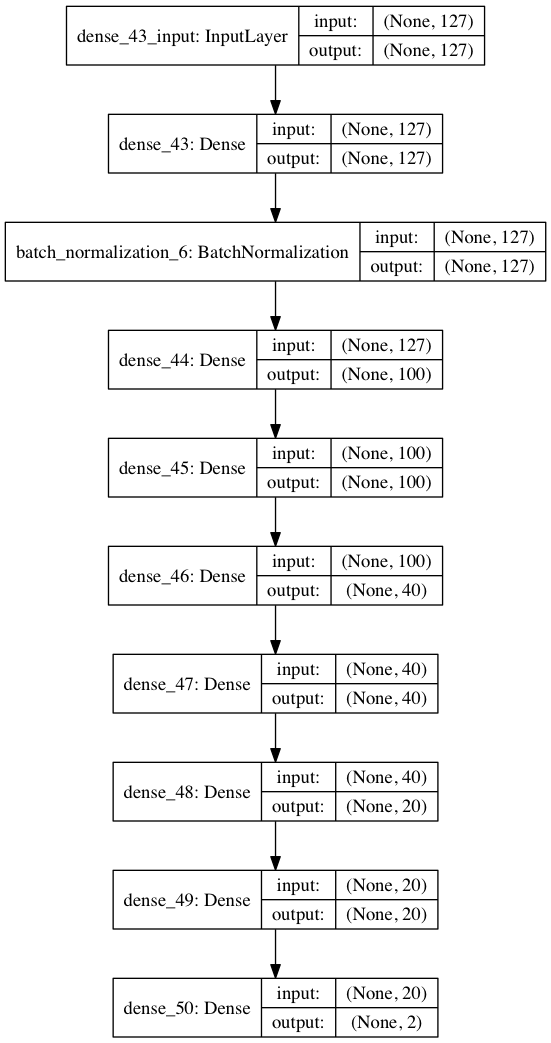

In [39]:

##########################################################################################
##########################################################################################

plot_model(model, to_file=name_png, show_layer_names=True, show_shapes=True)

print()
Image(filename=name_png) 


In [ ]:

##########################################################################################
# Convergence Plots
##########################################################################################
